#### Import Necessary Libararies

In [ ]:
import pandas as pd
import os

### Task 01: Merging Two sheets

In [ ]:
df = pd.read_csv("./Test_Data/RawData.csv")

files = [file for file in os.listdir('./Test_Data')]
all_Customers_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Test_Data/"+file)
    all_Customers_data = pd.concat([all_Customers_data, df])

all_Customers_data.to_csv("all_data.csv", index=False)



In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,1250,Muhammed Mac Intyre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1251,Barry French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1252,Clay Rozendal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1253,Carlos Soltero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1254,Carl Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean up the Data

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,1250,Muhammed Mac Intyre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1251,Barry French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1252,Clay Rozendal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1253,Carlos Soltero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1254,Carl Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,1250,Muhammed Mac Intyre,3,Order Finished,10/13/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,1251,Barry French,293,Order Finished,10/1/2012,49,20246040,0.07,1417223,Office Supplies,Appliances
2,1252,Clay Rozendal,483,Order Finished,7/10/2011,30,9931519,0.08,794522,Technology,Telephones & Communication
3,1253,Carlos Soltero,515,Order Finished,8/28/2010,19,788540,0.08,63083,Office Supplies,Appliances
4,1254,Carl Jackson,613,Order Finished,6/17/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


### Task 02 & 03 : ( Add net salary & Group Status )

In [ ]:
all_data = all_data.assign(Net_Sales = all_data['sales'] - all_data['discount_value'])

def group_status(status):
    if status == 'Order Finished':
        return 'Successful'
    else:
        return 'Fail'

all_data = all_data.assign(Group_Status = all_data['order_status'].apply(group_status))

all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status
0,1250,Muhammed Mac Intyre,3,Order Finished,10/13/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful
1,1251,Barry French,293,Order Finished,10/1/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful
2,1252,Clay Rozendal,483,Order Finished,7/10/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful
3,1253,Carlos Soltero,515,Order Finished,8/28/2010,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful
4,1254,Carl Jackson,613,Order Finished,6/17/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful


In [ ]:
all_data.to_csv('all_customers_data.csv')
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status
0,1250,Muhammed Mac Intyre,3,Order Finished,10/13/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful
1,1251,Barry French,293,Order Finished,10/1/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful
2,1252,Clay Rozendal,483,Order Finished,7/10/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful
3,1253,Carlos Soltero,515,Order Finished,8/28/2010,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful
4,1254,Carl Jackson,613,Order Finished,6/17/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful


### Task 04 : What is the net sales per Product Category?

In [ ]:
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status
0,1250,Muhammed Mac Intyre,3,Order Finished,10/13/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful
1,1251,Barry French,293,Order Finished,10/1/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful
2,1252,Clay Rozendal,483,Order Finished,7/10/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful
3,1253,Carlos Soltero,515,Order Finished,8/28/2010,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful
4,1254,Carl Jackson,613,Order Finished,6/17/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful


In [ ]:
all_data.groupby('product_category').sum('Net_Sales')

,Customer ID,order_id,order_quantity,sales,discount,discount_value,Net_Sales
product_category,,,,,,,
Furniture,1857406,34354356,29310,6655751588,56.99,311899198,6343852390
Office Supplies,4960427,92608680,78422,5348564320,154.09,270146650,5078417670
Technology,2070257,37843106,32611,7422758843,63.40,372056887,7050701956


In [ ]:
results = all_data.groupby('product_category').sum(['Net_Sales'])

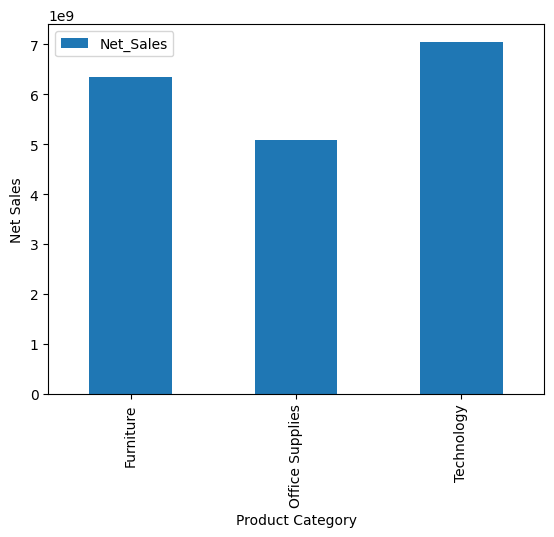

In [ ]:
import matplotlib.pyplot as plt

results.plot.bar(y = 'Net_Sales')
plt.ylabel('Net Sales')
plt.xlabel('Product Category')
plt.show()


In [ ]:
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status
0,1250,Muhammed Mac Intyre,3,Order Finished,10/13/2010,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful
1,1251,Barry French,293,Order Finished,10/1/2012,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful
2,1252,Clay Rozendal,483,Order Finished,7/10/2011,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful
3,1253,Carlos Soltero,515,Order Finished,8/28/2010,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful
4,1254,Carl Jackson,613,Order Finished,6/17/2011,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful


### Task 05: What is the total monthly sales per product category?

In [ ]:
monthly_sales_per_category = all_data.groupby(['product_category', 'order_date'])['Net_Sales'].sum()

print(monthly_sales_per_category)



product_category  order_date
Furniture         1/10/2009      6433211
                  1/10/2010     41026223
                  1/10/2011      3280131
                  1/10/2012     11875500
                  1/11/2010      3880640
                                  ...   
Technology        9/7/2011       1459677
                  9/8/2011       2657927
                  9/9/2010        865518
                  9/9/2011       7374860
                  9/9/2012         80580
Name: Net_Sales, Length: 2926, dtype: int64


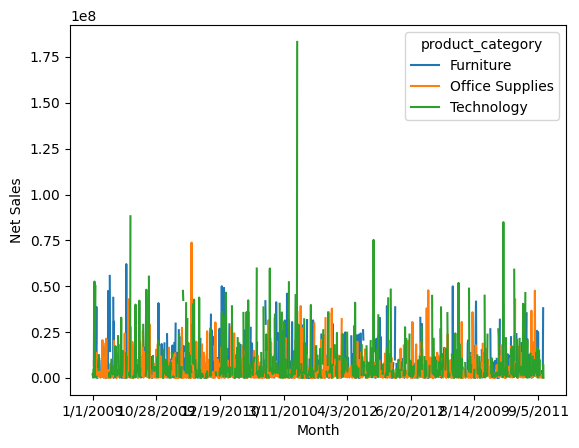

In [ ]:
monthly_sales_per_category = all_data.groupby(['order_date', 'product_category'])['Net_Sales'].sum()

monthly_sales_per_category.unstack().plot()

plt.ylabel('Net Sales')
plt.xlabel('Month')
plt.show()

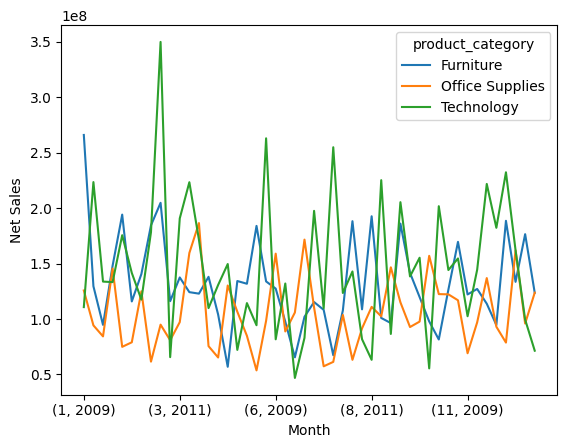

In [ ]:
all_data['month'] = pd.DatetimeIndex(all_data['order_date']).month

all_data['year'] = pd.DatetimeIndex(all_data['order_date']).year

monthly_sales_per_category = all_data.groupby(['month', 'year', 'product_category'])['Net_Sales'].sum()

monthly_sales_per_category.unstack().plot()

plt.ylabel('Net Sales')
plt.xlabel('Month')
plt.show()

In [ ]:
all_data['order_date'] = pd.to_datetime(all_data['order_date'])

all_data['month_year'] = all_data['order_date'].dt.strftime('%m-%Y')

all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status,month,year,month_year
0,1250,Muhammed Mac Intyre,3,Order Finished,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful,10,2010,10-2010
1,1251,Barry French,293,Order Finished,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful,10,2012,10-2012
2,1252,Clay Rozendal,483,Order Finished,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful,7,2011,07-2011
3,1253,Carlos Soltero,515,Order Finished,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful,8,2010,08-2010
4,1254,Carl Jackson,613,Order Finished,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful,6,2011,06-2011


In [ ]:
all_data.to_csv('all_customers_data.csv')
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status,month,year,month_year
0,1250,Muhammed Mac Intyre,3,Order Finished,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful,10,2010,10-2010
1,1251,Barry French,293,Order Finished,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful,10,2012,10-2012
2,1252,Clay Rozendal,483,Order Finished,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful,7,2011,07-2011
3,1253,Carlos Soltero,515,Order Finished,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful,8,2010,08-2010
4,1254,Carl Jackson,613,Order Finished,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful,6,2011,06-2011


Text(0.5, 0, 'Month & Year')

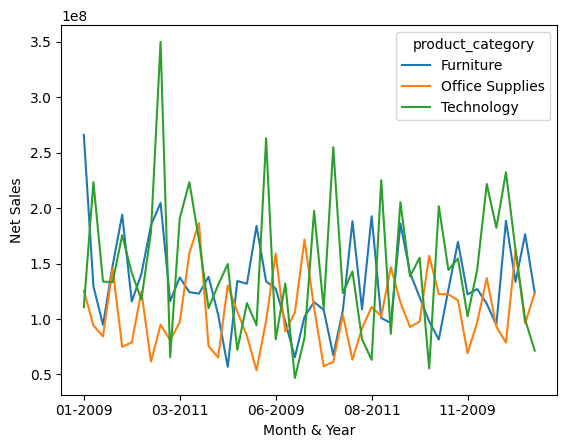

In [ ]:
monthly_sales_per_category = all_data.groupby(['month_year', 'product_category'])['Net_Sales'].sum()

monthly_sales_per_category.unstack().plot()

plt.ylabel('Net Sales')
plt.xlabel('Month & Year')

### Task 06: Export each product category data in excel sheet and store it in "Output files" folder

In [ ]:
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status,month,year,month_year
0,1250,Muhammed Mac Intyre,3,Order Finished,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful,10,2010,10-2010
1,1251,Barry French,293,Order Finished,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful,10,2012,10-2012
2,1252,Clay Rozendal,483,Order Finished,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful,7,2011,07-2011
3,1253,Carlos Soltero,515,Order Finished,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful,8,2010,08-2010
4,1254,Carl Jackson,613,Order Finished,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful,6,2011,06-2011


### Task 07: Export each product category data in excel sheet and store it in "Output files" folder

In [ ]:
df = pd.read_csv("all_customers_data.csv")

In [ ]:
categories = df["product_category"].unique()

In [ ]:
if not os.path.exists("Output files"):
    os.mkdir("Output files")

In [ ]:
for cat in categories:
    df_cat = df[df["product_category"] == cat]

    if cat == "Technology":
        df_cat = df_cat[df_cat["order_status"] == "Order Finished"]

    df_cat.to_csv(f"Output files/{cat}.csv", index=False)

### Task 08: Create a Customer segmentation based on (no of finished orders & avg sales) criteria

In [ ]:
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status,month,year,month_year
0,1250,Muhammed Mac Intyre,3,Order Finished,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful,10,2010,10-2010
1,1251,Barry French,293,Order Finished,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful,10,2012,10-2012
2,1252,Clay Rozendal,483,Order Finished,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful,7,2011,07-2011
3,1253,Carlos Soltero,515,Order Finished,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful,8,2010,08-2010
4,1254,Carl Jackson,613,Order Finished,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful,6,2011,06-2011


In [ ]:
df = pd.read_csv("all_customers_data.csv")

In [ ]:
all_data.head()

,Customer ID,Customer Name,order_id,order_status,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,Net_Sales,Group_Status,month,year,month_year
0,1250,Muhammed Mac Intyre,3,Order Finished,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization,502157,Successful,10,2010,10-2010
1,1251,Barry French,293,Order Finished,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,18828817,Successful,10,2012,10-2012
2,1252,Clay Rozendal,483,Order Finished,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication,9136997,Successful,7,2011,07-2011
3,1253,Carlos Soltero,515,Order Finished,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances,725457,Successful,8,2010,08-2010
4,1254,Carl Jackson,613,Order Finished,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories,181468,Successful,6,2011,06-2011
